# Freesound Pitch Estimation Assessment
In this document the quality of the Freesound Pitch estimation algorithm applied to single-note sounds will be assessed. From this assessment possible improvements to the algorithm or the usage of the algorithm are proposed and discussed.

In [1]:
# import some libraries:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# load some utillity functions
import util as ut
# load results:
from loadResults import *

importing functions
loading data
loading Freesound data
done


# 0: Introduction
$DESCRIBE-FREESOUND + GOAL-OF-PITCH-ESTIMATOR-ASSESSMENT$
The Freesound pitch estimation is done using the pitchYinFFT algorithm contained in the Essentia library [$REF$]. The pitchYinFFT is a optimalisation proposed by Brossier (Brossier, 2007) for reduced calculation time of the YIN algorithm of Cheveigné and Kawahara (Cheveigné & Kawahara, 2002). 

In this document the performance of the pitch estimation algorithm used by Freesound to estimate the pitches of sounds on single-note sounds will be assessed. This assessment will consist of a observation of the quality of the estimation (1), followed by a discussion on factors able to predict the quality of this estimation (2). Lastly possible improvements to the algorithm or the useage of the algorithm will be proposed and discussed (3).

## 0.1: The Sounds
The sounds used in this assessment come partly form Freesound and partly from two non-Freesound sources. The Freesound sounds come from two different sources: the sounds uploaded by the users Carlos Vaquero and the sounds containing the tag 'good-sounds'. The non-Freesound sounds come from two sources mentioned in the masterthesis "Improving the description of instrumental sounds by using ontologies and automatic content analysis" by Carlos Vaquero (Vaquero, 2012). Namely sounds from the Philharmonia Orchestra [$REF$] and the piano pack from The University of Iowa Musical Instrument Samples (or as they call it MIS) [$REF$]. 

### 0.1.1: Contents of the sounds
All of the sounds are single-note sounds from real instruments. The sounds from the user Carlos Vaquero are recordings from different western instruments containting, among others, acoustic guitar, recorder, bassoon, several bowed instruments (played plucked and bowed with different techniques). The sounds with the tag 'good-sounds' are also single-notes of several western instruments, but only played with a 'normal' playing technique. The sounds from the Philharmonia Orchestra are several (vast) collections of sounds from different instruments of the orchestra, played in a wide range of techniques. The sounds chosen fro m the Philharmonia Orchestra are the cello, clarinet, guitar and violin. Lastly the sounds taken from the University of IOWA include piano, cello, trumpet, marimba and xylophone. All the sounds had to be checked to make sure no sounds with multiple pitches or ambiguous pitches were included into the calculation.

Below the amount of sounds contained in each pack as well as the distribution of the annotated pitches are shown:

Amount of sounds per source:
Freesound:
	Carlos		470 sounds
	good-sounds:	113 sounds
non-Freesound:
	Philharmonia:	2973 sounds
	IOWA:		639 sounds

Total:			4195 sounds

Annotated pitch distributions:


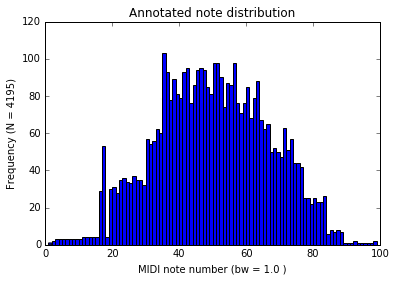

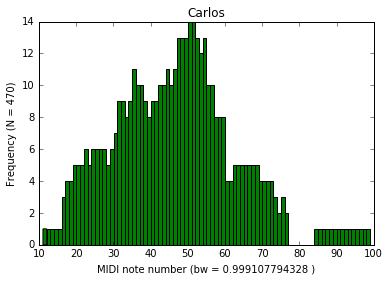

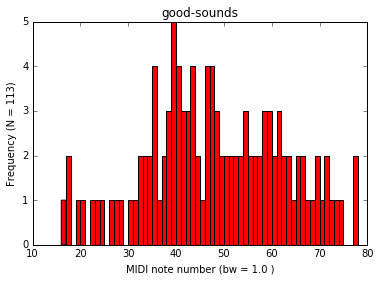

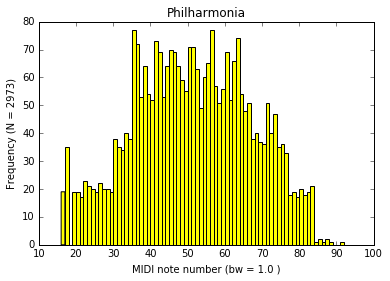

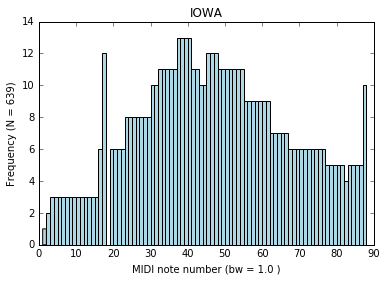

In [2]:
print "Amount of sounds per source:"
print "Freesound:\n\tCarlos\t\t" + str(csN) + " sounds\n\tgood-sounds:\t" + str(gsN) + " sounds"
print "non-Freesound:\n\tPhilharmonia:\t" + str(phN) + " sounds\n\tIOWA:\t\t" + str(iwN) + " sounds\n" 
N = csN + gsN + phN + iwN
print "Total:\t\t\t" + str(N) + " sounds\n"
print "Annotated pitch distributions:"
pTag = pool['annotated.pitch']; midi = ut.freq2midi(pTag)
hst = plt.hist(midi, range=(min(midi), max(midi)), bins=max(midi)-min(midi)); plt.title("Annotated note distribution"); bw = hst[1][3]-hst[1][2]; plt.xlabel("MIDI note number (bw = " + str(bw) + " )"); plt.ylabel("Frequency (N = " + str(N) + ")");  plt.show();
hst = plt.hist(midi[:csN], range=(min(midi[:csN]), max(midi[:csN])), bins=np.round(max(midi[:csN])-min(midi[:csN])), color='green'); plt.title("Carlos"); bw = hst[1][3]-hst[1][2]; plt.xlabel("MIDI note number (bw = " + str(bw) + " )");plt.ylabel("Frequency (N = " + str(csN) + ")"); plt.show();
hst = plt.hist(midi[csN:csN+gsN], range=(min(midi[csN:csN+gsN]), max(midi[csN:csN+gsN])), bins=np.round(max(midi[csN:csN+gsN])-min(midi[csN:csN+gsN])), color='red'); plt.title("good-sounds"); bw = hst[1][3]-hst[1][2]; plt.xlabel("MIDI note number (bw = " + str(bw) + " )"); plt.ylabel("Frequency (N = " + str(gsN) + ")"); plt.show();
hst = plt.hist(midi[csN+gsN:csN+gsN+phN], range=(min(midi[csN+gsN:csN+gsN+phN]), max(midi[csN+gsN:csN+gsN+phN])), bins=np.round(max(midi[csN+gsN:csN+gsN+phN])-min(midi[csN+gsN:csN+gsN+phN])), color='yellow'); plt.title("Philharmonia"); bw = hst[1][3]-hst[1][2]; plt.xlabel("MIDI note number (bw = " + str(bw) + " )"); plt.ylabel("Frequency (N = " + str(phN) + ")"); plt.show();
hst = plt.hist(midi[csN+gsN+phN:], range=(min(midi[csN+gsN+phN:]), max(midi[csN+gsN+phN:])), bins=np.round(max(midi[csN+gsN+phN:])-min(midi[csN+gsN+phN:])), color='lightblue'); plt.title("IOWA"); bw = hst[1][3]-hst[1][2]; plt.xlabel("MIDI note number (bw = " + str(bw) + " )"); plt.ylabel("Frequency (N = " + str(iwN) + ")"); plt.show();

### 0.1.2 Comparison of Freesound and locally computed data
The data is computated locally trying to reproduce the data obtained from Freesound to allow to include sounds from non-Freeosund sources with verified annotations. Ideally the values obtained trough local calculation and the central calculation at uploadtime will be the same, although some small differences may occur. Below are the differences obtained between the Freesounddata and the locally calculated data.

Pitch estimation:
	Freesound:	μ: 411.667 Hz	(σ: 305.264 Hz)
	Local:		μ: 417.284 Hz	(σ: 309.571 Hz)
Point-wise difference:	11.1967 Hz

Confidence:
	Freesound:	μ: 0.734088	(σ: 0.152733)
	Local:		μ: 0.726825	(σ: 0.155669)
Point-wise difference:	0.00783831

Confidence:
	Freesound:	μ: 0.468032	(σ: 0.135647)
	Local:		μ: 0.467247	(σ: 0.135743)
Point-wise difference:	0.00548839



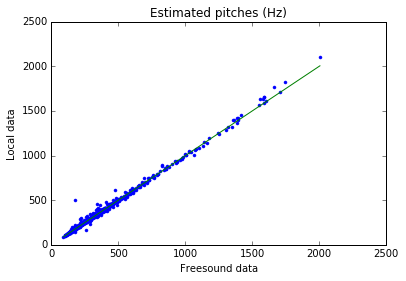

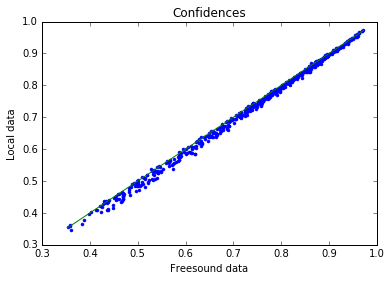

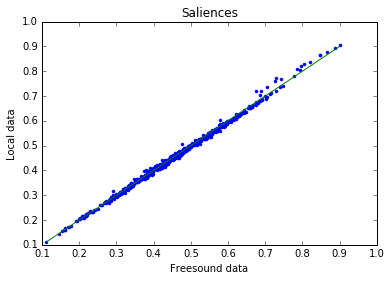

Minimal and maximal values:
Estimated pitches:
	Freesound:	[89.9533Hz,	2004.75Hz]
	Local:		[89.1426Hz,	2105.35Hz]
Confidences:
	Freesound:	[0.353488,	0.971915]
	Local:		[0.34735,	0.974891]
Saliences:
	Freesound:	[0.111462,	0.900048]
	Local:		[0.109506,	0.90607]


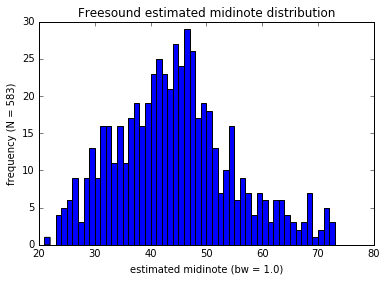

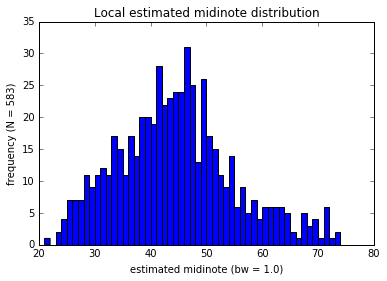

In [3]:
frs_pEst = frsPool['analysis.lowlevel.pitch.mean'];
loc_pEst = locPool['lowLevel.pitch.mean']
print "Pitch estimation:"
print "\tFreesound:\tμ: " + str(np.mean(frs_pEst)) + " Hz\t(σ: " + str(np.std(frs_pEst)) + " Hz)"
print "\tLocal:\t\tμ: " + str(np.mean(loc_pEst)) + " Hz\t(σ: " + str(np.std(loc_pEst)) + " Hz)"
print "Point-wise difference:\t" + str(np.mean(abs(frs_pEst - loc_pEst))) + " Hz\n"

frs_conf = frsPool['analysis.lowlevel.pitch_instantaneous_confidence.mean']
loc_conf = locPool['lowLevel.pitch_instantaneous_confidence.mean']
print "Confidence:"
print "\tFreesound:\tμ: " + str(np.mean(frs_conf)) + "\t(σ: " + str(np.std(frs_conf)) + ")"
print "\tLocal:\t\tμ: " + str(np.mean(loc_conf)) + "\t(σ: " + str(np.std(loc_conf)) + ")"
print "Point-wise difference:\t" + str(np.mean(abs(frs_conf - loc_conf))) + "\n"

frs_sal = frsPool['analysis.lowlevel.pitch_salience.mean']
loc_sal = locPool['lowLevel.pitch_salience.mean']
print "Confidence:"
print "\tFreesound:\tμ: " + str(np.mean(frs_sal)) + "\t(σ: " + str(np.std(frs_sal)) + ")"
print "\tLocal:\t\tμ: " + str(np.mean(loc_sal)) + "\t(σ: " + str(np.std(loc_sal)) + ")"
print "Point-wise difference:\t" + str(np.mean(abs(frs_sal - loc_sal))) + "\n"

plt.plot(frs_pEst, loc_pEst, '.'); plt.title('Estimated pitches (Hz)'); plt.xlabel('Freesound data'); plt.ylabel('Local data'); plt.plot([min(frs_pEst), max(frs_pEst)], [min(frs_pEst), max(frs_pEst)]); plt.show()
plt.plot(frs_conf, loc_conf, '.'); plt.title('Confidences'); plt.xlabel('Freesound data'); plt.ylabel('Local data');  plt.plot([min(frs_conf), max(frs_conf)], [min(frs_conf), max(frs_conf)]); plt.show()
plt.plot(frs_sal, loc_sal, '.'); plt.title('Saliences'); plt.xlabel('Freesound data'); plt.ylabel('Local data');  plt.plot([min(frs_sal), max(frs_sal)], [min(frs_sal), max(frs_sal)]); plt.show()

print "Minimal and maximal values:"
print "Estimated pitches:"
print "\tFreesound:\t[" + str(min(frs_pEst)) + "Hz,\t" + str(max(frs_pEst)) + "Hz]"
print "\tLocal:\t\t[" + str(min(loc_pEst)) + "Hz,\t" + str(max(loc_pEst)) + "Hz]"
print "Confidences:"
print "\tFreesound:\t[" + str(min(frs_conf)) + ",\t" + str(max(frs_conf)) + "]"
print "\tLocal:\t\t[" + str(min(loc_conf)) + ",\t" + str(max(loc_conf)) + "]"
print "Saliences:"
print "\tFreesound:\t[" + str(min(frs_sal)) + ",\t" + str(max(frs_sal)) + "]"
print "\tLocal:\t\t[" + str(min(loc_sal)) + ",\t" + str(max(loc_sal)) + "]"

frs_midiEst = ut.freq2midi(frs_pEst); loc_midiEst = ut.freq2midi(loc_pEst);
hst = plt.hist(frs_midiEst, range=(int(min(frs_midiEst)), int(max(frs_midiEst))), bins=(int(max(frs_midiEst)) - int(min(frs_midiEst)))); bw = hst[1][3]-hst[1][2]; plt.title("Freesound estimated midinote distribution"); plt.xlabel("estimated midinote (bw = " + str(bw) + ")"); plt.ylabel("frequency (N = " + str(len(frs_midiEst)) + ")"); plt.show();
hst = plt.hist(loc_midiEst, range=(int(min(loc_midiEst)), int(max(loc_midiEst))), bins=(int(max(loc_midiEst)) - int(min(loc_midiEst)))); bw = hst[1][3]-hst[1][2]; plt.title("Local estimated midinote distribution"); plt.xlabel("estimated midinote (bw = " + str(bw) + ")"); plt.ylabel("frequency (N = " + str(len(loc_pEst)) + ")"); plt.show();

The difference between the results from Freesound and the locally computed data are probably attributable to the usage of an older version of the Essentia extractor in Freesound. Because of this the locally computed data will be used in the remaining part of this assessment.

# 1: Performance of the pitch estimation
The performance of the pitch estimation algortihm will be assessed by comparing the pitch estimated by the algorithm against the pitch annotated for that sound, taken either from the filename or the descriptions and/or tags of the sounds.

Firstly the correctness of the pitch estimation will be assessed. Secondly some possible factors which can predict the correctness of the estimation will be discussed, thus investigating possible improvements. The confidence measurements from the pitchYinFFT algorithm and the annotated pitches will be compared to the succes of the estimations and the values of some aural and musical descriptors will be correlated to the error values obtained in the assessment.

## 1.1: Performance of the Pitch Estimation
In the next section the results of the pitch estimation are presented and some inferences from these results are discussed.

Pitch distributions


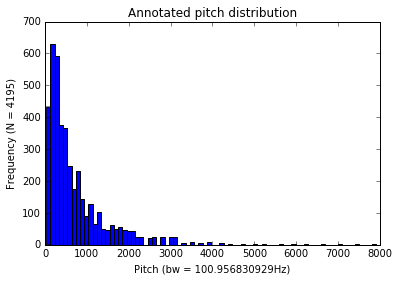

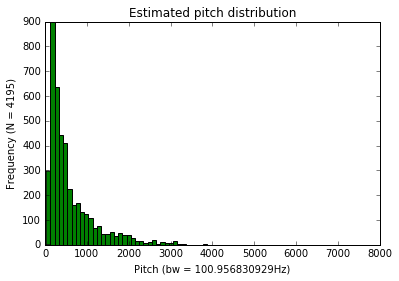

In [4]:
print "Pitch distributions"
pTag = pool['annotated.pitch']; pEst = pool['lowLevel.pitch.median']
hst = plt.hist(pTag, range=(min(pTag), max(pTag)), bins=int(max(pTag)-min(pTag))/100); bw = hst[1][3]-hst[1][2]; plt.title('Annotated pitch distribution'); plt.xlabel('Pitch (bw = ' + str(bw) + 'Hz)'); plt.ylabel('Frequency (N = '+str(len(pTag)) + ')'); plt.show()
hst = plt.hist(pEst, range=(min(pTag), max(pTag)), bins=int(max(pTag)-min(pTag))/100, color='green'); bw = hst[1][3]-hst[1][2];  plt.title('Estimated pitch distribution'); plt.xlabel('Pitch (bw = ' + str(bw) + 'Hz)'); plt.ylabel('Frequency (N = '+str(len(pEst)) + ')'); plt.show()

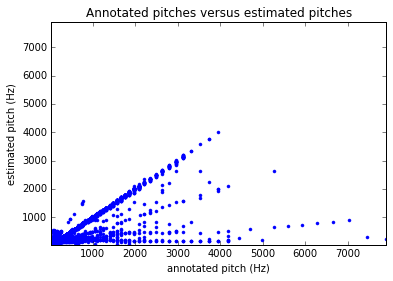

Mean error (annotated - estimated):	109.24Hz	(σ: 504.499)
Median error:				-0.62088Hz


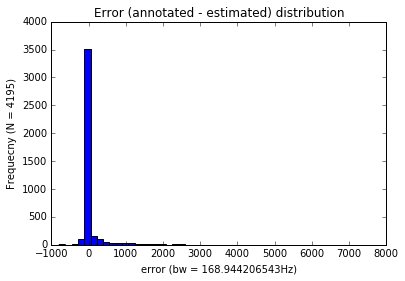

83.6471990465% of the errors fall within the band:	[-118.840727539Hz,	50.1034790039Hz]

Precentage of sounds with annotated lower than estimated pitch: 58.3075089392%

Pitches:
	Annotated:	μ: 711.672Hz	(σ: 749.018Hz)	median: 440.0Hz
	Estimated:	μ: 602.432Hz	(σ: 584.158Hz)	median: 390.196Hz



In [5]:
fig = plt.figure(); ax = fig.add_subplot(111); ax.plot(pTag, pEst, '.'); ax.axis([min(pTag), max(pTag), min(pTag), max(pTag)]); plt.title('Annotated pitches versus estimated pitches'); plt.xlabel('annotated pitch (Hz)'); plt.ylabel('estimated pitch (Hz)'); plt.show();
err = pTag - pEst; 
print 'Mean error (annotated - estimated):\t' + str(np.mean(err)) + 'Hz\t(σ: ' + str(np.std(err)) + ')'
print 'Median error:\t\t\t\t' + str(np.median(err)) + 'Hz';
hst = plt.hist(err, bins=50); bw = hst[1][3]-hst[1][2]; plt.title("Error (annotated - estimated) distribution"); plt.xlabel('error (bw = ' + str(bw) + 'Hz)'); plt.ylabel('Frequecny (N = ' + str(len(err)) + ')'); 
maxBand = np.where(hst[0] == max(hst[0]))[0]; lbound = hst[1][maxBand][0]; rbound = hst[1][maxBand+1][0];

plt.show();
print str(hst[0][maxBand][0] / float(np.sum(hst[0])) * 100) + "% of the errors fall within the band:\t[" + str(lbound) + "Hz,\t" + str(rbound) + "Hz]\n"
print "Precentage of sounds with annotated lower than estimated pitch: " + str(len(np.where(err < 0)[0]) / float(len(err)) * 100) + "%\n"

print 'Pitches:\n\tAnnotated:\tμ: ' + str(np.mean(pTag)) + 'Hz\t(σ: ' + str(np.std(pTag)) + 'Hz)\tmedian: ' + str(np.median(pTag)) + 'Hz'
print '\tEstimated:\tμ: ' + str(np.mean(pEst)) + 'Hz\t(σ: ' + str(np.std(pEst)) + 'Hz)\tmedian: ' + str(np.median(pEst)) + 'Hz\n'



Most errors fall within a bandwidth close to $0$Hz. However the mean of the point-wise errors is around $109$Hz. Looking at the mean error and the mean and median values of the annotated versus the estimated pitches the pitch estimator tends to estimate pitches lower than the anntotation. However when the median value of the point-wise errors and the percentage of sounds with a higher annotation than estimation, suggest that there are some big differences where the estimation is cosiderably lower than the annotation. Also the median of the point-wise errors lies very close to $0$Hz thus it can be inferred that no clear tendency to estimate too low or too high can be determined.

As pitch is clearly a human percept it is more usefull not to talk in terms of frequencies, but some other scale is preferred. Below the error values are converted to Equivalent Rectangular Bandwidths and to semitones. In the rest of this document the semitone difference is used, as this is a in the scope of the current project a understandable and meaningfull measure.

Equivalent Rectangluar Bandwidths
The percentage of correct estimations (distance less than 1 ERB): 82.34%


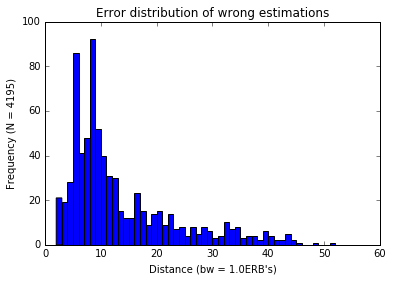

Mean ERB distance:	3.11918951132 ERB's	(σ: 6.14955457837 ERB's)
Median ERB distance:	1.0 ERB's

Semitones
783
The percentage of correct estimations (distance less than 1 semitone): 81.33%


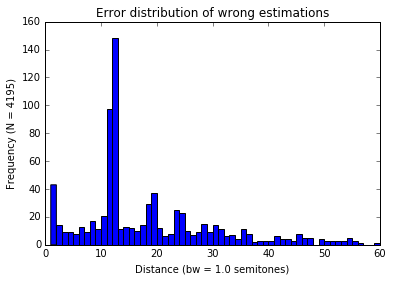

Mean semitone distance:		3.57913739034 st	(σ: 8.94656820922 st)
Median semitone distance:	0.123367972045 st



In [6]:
print "Equivalent Rectangluar Bandwidths"
erb = abs(pa.ERBdist(pTag, pEst));
i_err = np.where(erb > 1)[0];
print "The percentage of correct estimations (distance less than 1 ERB): %5.2f%%" % ((len(erb) - len(i_err)) / float(len(erb)) * 100)
erb_err = erb[i_err];
hst = plt.hist(erb_err, range=(min(erb_err), max(erb_err)), bins=max(erb_err) - min(erb_err)); plt.title('Error distribution of wrong estimations');  bw = hst[1][3] - hst[1][2]; plt.xlabel('Distance (bw = ' + str(bw) + "ERB's)"); plt.ylabel('Frequency (N = ' + str(len(erb)) + ')'); plt.show();
maxBand = np.where(hst[0] == max(hst[0]))[0];
print "Mean ERB distance:\t" + str(np.mean(erb)) + " ERB's\t(σ: " + str(np.std(erb)) + " ERB's)"
print "Median ERB distance:\t" + str(np.median(erb)) + " ERB's\n"
#print str(hst[0][maxBand][0] / float(np.sum(hst[0])) * 100) + "% of the trials fall within the band:\t[" + str(hst[1][maxBand][0]) + "ERBs, " + str(hst[1][maxBand+1][0]) + "ERBs]\n"

print "Semitones"
st = abs(pa.semitoneDist(pTag, pEst));
i_err = np.where(st > 1)[0];
print len(i_err)
print "The percentage of correct estimations (distance less than 1 semitone): %5.2f%%" % ((len(st) - len(i_err)) / float(len(st)) * 100)
st_err = st[i_err]
hst = plt.hist(st_err, range=(np.round(min(st_err)), np.round(max(st_err))), bins=(max(st_err) - min(st_err))); plt.title('Error distribution of wrong estimations'); bw = hst[1][3] - hst[1][2]; plt.xlabel('Distance (bw = ' + str(bw) + " semitones)"); plt.ylabel('Frequency (N = ' + str(len(st)) + ')'); plt.show();
maxBand = np.where(hst[0] == max(hst[0]))[0];
print "Mean semitone distance:\t\t" + str(np.mean(st)) + " st\t(σ: " + str(np.std(st)) + " st)"
print "Median semitone distance:\t" + str(np.median(st)) + " st\n"
#print str(hst[0][maxBand][0] / float(np.sum(hst[0])) * 100) + "% of the trials fall within the band:\t[" + str(hst[1][maxBand][0]) + "st, " + str(hst[1][maxBand+1][0]) + "st]"



As can be seen from the above histograms around $82$% of the estimations fall within the same ERB as the annotated pitch and $81$% of the estimations differ less than 1 semitone from the annotated pitch. From this point onward the estimations with a difference between the estimation and annotation of less than one semitone are called 'correct estimations'. Estimations with a difference bigger or equal to one semitone are called 'incorrect estimations'.

A common error in pitch estimations are ocatve errors (Gerhard, 2003), here the pitch is estimated to be a (sub) harmonic of the annotated pitch of the sound. In the semitone distance plot a clear peak can be seen in the bands corresponding to a distance of around $12$ semitones, which corresponds to a distance of one octave. 

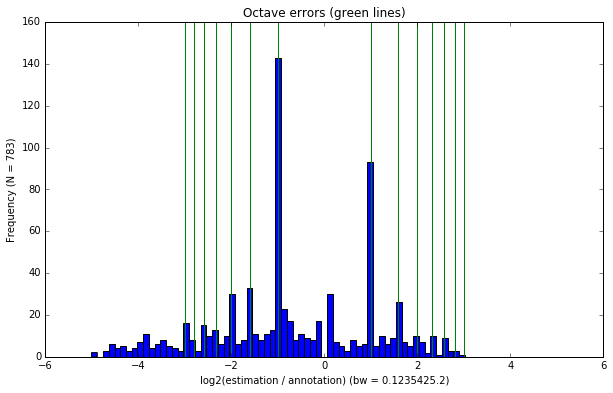

Around 52.36% of all errors can be accounted for by octave errors


In [7]:
midiTag = ut.freq2midi(pTag); midiEst = ut.freq2midi(pEst);
i_err = np.where(abs(midiTag-midiEst) > 1)[0];
x = np.log2(pEst[i_err] / pTag[i_err]);
#hst = plt.hist(x, range=(-hN, hN), bins=int(hN*2)*3); plt.title("Ratio estimated pitch v.s. annotated pitch of wrongly estimated sounds"); plt.xlabel("log2(estimated midinote / annotated midinote) (bw = " + str(hst[1][3]-hst[1][2]) + ")"); plt.ylabel("Frequency (N = " + str(len(i_err)) + ")"); plt.show();

fig, ax = plt.subplots(1, 1, figsize=(10, 6));
hst = ax.hist(x, range=(-max(-x), max(-x)), bins=16*np.round(max(-x)) + 1); bw = hst[1][3]-hst[1][2];
ax.plot()
for i in range(2, 9):
    ax.axvline(x=np.log2(i / 1), color='green');
    ax.axvline(x=-np.log2(i / 1), color='green');

plt.title('Octave errors (green lines)'); bw = hst[1][3]-hst[1][2];
plt.xlabel('log2(estimation / annotation) (bw = %f5.2)' % bw); plt.ylabel('Frequency (N = %d)' % np.sum(hst[0]));
plt.show();  

# octave errors:
supOctErr = 0;
subOctErr = 0;
i_octErrEdges = list();
for i in range(1, 9):
    val = np.log2(i);
    i_sup = 0; i_sub = 0
    for lbound in hst[1]:
        if lbound < -val:
            i_sub += 1
        if lbound < val:
            i_sup += 1
    subOctErr += hst[0][i_sub-1];
    supOctErr += hst[0][i_sup-1];
    i_octErrEdges.append((hst[1][i_sub-1], hst[1][i_sub]))
    i_octErrEdges.append((hst[1][i_sup-1], hst[1][i_sup]))
    
i_octErr = list();
for binEdges in i_octErrEdges:
        i = 0;
        for val in x:
            if val > binEdges[0] and val < binEdges[1]:
                i_octErr.append(i)
            i+=1
i_octErr = i_err[i_octErr];

st_err = st[i_err];
print "Around %2.2f%% of all errors can be accounted for by octave errors" % ((supOctErr+subOctErr) / np.sum(hst[0]) * 100);


In [46]:
print max(i_octErr), csN+gsN+phN+iwN

4161 4195


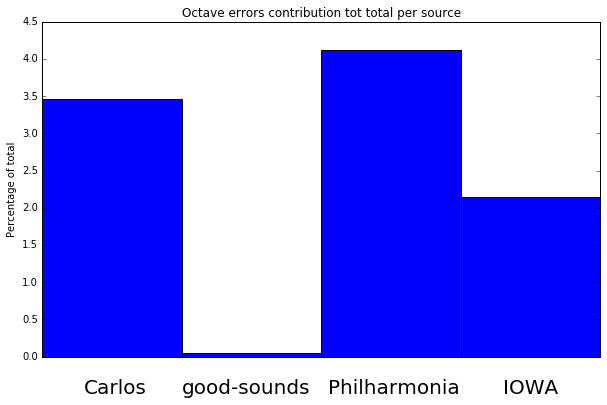

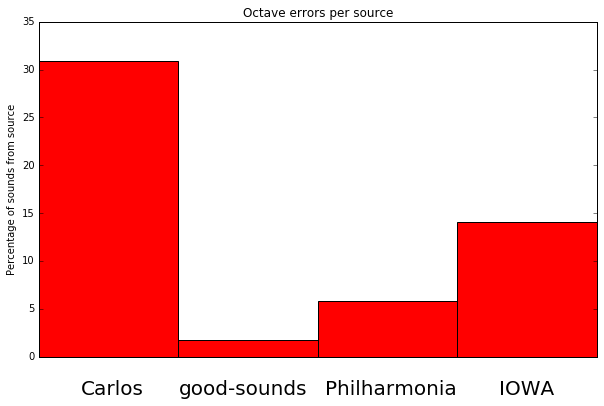

In [127]:
copy_i = np.copy(i_octErr);
cs_octErr = np.where(copy_i < csN)[0]
#print "Carlos:\t\t%2.2f%%\toctave errors" % (len(cs_octErr) / float(csN) * 100)
copy_i = np.delete(copy_i, cs_octErr)

gs_octErr = np.where(copy_i < csN+gsN)[0]
#print "good-sounds:\t%2.2f%%\toctave errors" % (len(gs_octErr) / float(gsN) * 100)
copy_i = np.delete(copy_i, gs_octErr)

ph_octErr = np.where(copy_i < csN+gsN+phN)[0];
#print "Philharmonia:\t%2.2f%%\toctave errors" % (len(ph_octErr) / float(phN) * 100)
copy_i = np.delete(copy_i, ph_octErr)

iw_octErr = np.where(copy_i < csN+gsN+phN+iwN)[0];
#print "IOWA:\t\t%2.2f%%\toctave errors" % (len(iw_octErr) / float(iwN) * 100)

fig, ax = plt.subplots(1, 1, figsize=(10, 6));
octErrs = np.array([len(cs_octErr), len(gs_octErr), len(ph_octErr), len(iw_octErr)])
#ax.plot(octErrs / float(csN+gsN+phN+iwN) * 100, ls='steps')
ax.bar(np.arange(len(octErrs)), octErrs / float(csN+gsN+phN+iwN) * 100 , width=1);
ax.text(0.3, -0.5, 'Carlos', fontsize=20)
ax.text(1, -0.5, 'good-sounds', fontsize=20)
ax.text(2.05, -0.5, 'Philharmonia', fontsize=20)
ax.text(3.3, -0.5, 'IOWA', fontsize=20)
ax.get_xaxis().set_visible(False)
plt.title("Octave errors contribution tot total per source");
plt.ylabel("Percentage of total")
plt.show();

fig, ax = plt.subplots(1, 1, figsize=(10, 6));
octErrs = np.array([len(cs_octErr), len(gs_octErr), len(ph_octErr), len(iw_octErr)]) / np.array([float(csN), float(gsN), float(phN), float(iwN)])
#ax.plot(octErrs / float(csN+gsN+phN+iwN) * 100, ls='steps')
ax.bar(np.arange(len(octErrs)), octErrs * 100 , width=1, color='red');
ax.text(0.3, -4, 'Carlos', fontsize=20)
ax.text(1, -4, 'good-sounds', fontsize=20)
ax.text(2.05, -4, 'Philharmonia', fontsize=20)
ax.text(3.3, -4, 'IOWA', fontsize=20)
ax.get_xaxis().set_visible(False)
plt.title("Octave errors per source");
plt.ylabel("Percentage of sounds from source")
plt.show();





# 2: Predictors
In this section measurements to predict the performance of the estimation are investigated. 
Firstly predictors for the amplitude of the errors are looked at. After this factors which indicate the occurence of octave errors will be investigated, as about $50$% of the errors is caused by octave errors.

## 2.1: Prediction of errors
In this section several values returned by the pitch estimation algorithm and values obtained from several descriptors are investigated to determine how well they predict the correctness of the estimation. Firstly some values returned by the pitchYinFFT and one measure directly related to the tonality of the signal are discussed. Secondly some other tonal and aural descriptors which can predict high error values are searched.

### 2.1.1: Confidence, Variance & Salience
The pitch estimator used returns a confidence measurement, this should be a measure for the quality of the estimation. Besides the confidence measure the variance of the pitch estimation for each sound could be a prediction for the quality of the estimation. The pitch estimation is combined with a pitch salience measurement. Salience is an indication for howmuch tonal information the signal contains and as the pitch estimator is designed for tonal sound this could also be a predictor for the size of the estimation errors.

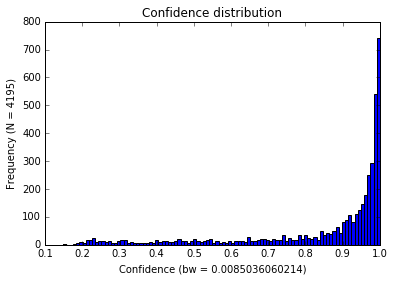

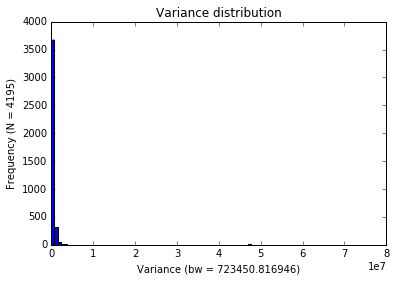

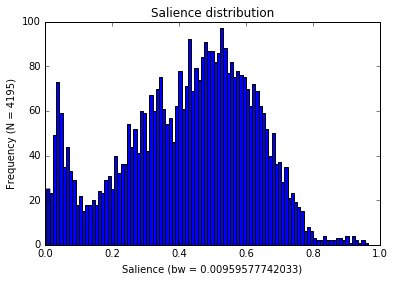

In [8]:
conf = pool['lowLevel.pitch_instantaneous_confidence.median']; var = pool['lowLevel.pitch.var']; sal = pool['lowLevel.pitch_salience.median'];
hst = plt.hist(conf, bins=100); bw = hst[1][3]-hst[1][2]; plt.title("Confidence distribution"); plt.xlabel("Confidence (bw = " + str(bw) + ")"); plt.ylabel("Frequency (N = " + str(len(conf)) + ")"); plt.show()
hst = plt.hist(var, bins=100); bw = hst[1][3]-hst[1][2]; plt.title("Variance distribution"); plt.xlabel("Variance (bw = " + str(bw) + ")"); plt.ylabel("Frequency (N = " + str(len(var)) + ")"); plt.show()
hst = plt.hist(sal, bins=100); bw = hst[1][3]-hst[1][2]; plt.title("Salience distribution"); plt.xlabel("Salience (bw = " + str(bw) + ")"); plt.ylabel("Frequency (N = " + str(len(sal)) + ")"); plt.show()

In the plot below the precision and recall of the confidence, variance and salience can be seen. For each value of the predictor (confidence, variance or salience) an accuracy is calculated (ratio of correctly included versus total amount of accepted sounds). The variance is taken as a logarithmic scale as this provided a more informative predictor.
It is visible from the graph that all the measurements perform equally well with a low minimal predictor value. However the confidence measurement clearly outperforms the other with a higher minimal value both in terms of sounds included without suffering a loss in accuracy.

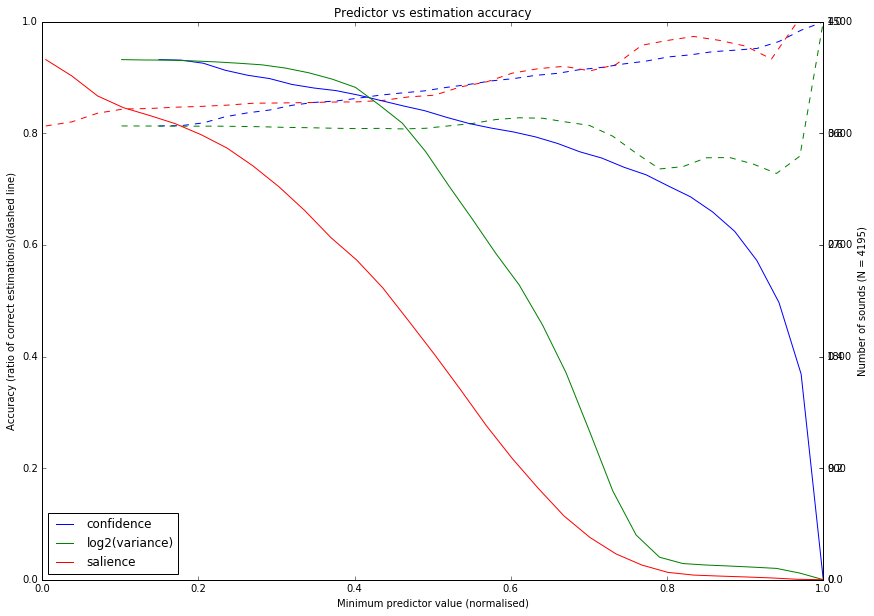

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(14, 10))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

st = abs(pa.semitoneDist(pTag, pEst));
conf = ut.normalise(pool['lowLevel.pitch_instantaneous_confidence.median']);
var = ut.normalise(np.log2(pool['lowLevel.pitch.var']));
sal = ut.normalise(pool['lowLevel.pitch_salience.median']);

descriptors = [conf, var, sal];
d_names = ['confidence', 'log2(variance)', 'salience'];
i = 0
y_min = list(); y_max = list()
for descr in descriptors:
    values, edges = np.histogram(descr, bins=30)
    accuracies = list();
    counts = list()
    
    for d_min in edges:
        # Take only dataset instances with confidence above conf_min
        i_incl = np.where(descr >= d_min)[0]
        i_excl = np.where(descr < d_min)[0]
        filtered_data = st[i_incl];
        #accuracies.append((np.sum(st) - np.sum(st[np.where(st[i_incl] > 1)])) / np.sum(st))

        tP = len(np.where(abs(st[i_incl]) < 1)[0]);
        tN = len(np.where(abs(st[i_excl]) >= 1)[0]);
        fP = len(np.where(abs(st[i_incl]) >= 1)[0]);
        fN = len(np.where(abs(st[i_excl]) < 1)[0]);
        acc = (tP) / float(tP+fP)
        accuracies.append(acc);
        counts.append(len(filtered_data))

    ax1.plot(edges[:len(accuracies)], accuracies, ls="--", label=d_names[i]);
    ax2.plot(edges[:len(accuracies)], counts, label=d_names[i])
    y_min.append(min(accuracies)); y_max.append(max(accuracies));
    i += 1
    
ax1.set_title('Predictor vs estimation accuracy')
ax1.set_ylabel('Accuracy (ratio of correct estimations)(dashed line)')
ax1.set_xlabel('Minimum predictor value (normalised)')
ax2.set_ylabel('Number of sounds (N = ' + str(len(st)) + ')')
ax2.legend(loc=3)
ax1.set_ylim(0, 1)
#ax1.set_yticks([float(ax1.get_ylim()[1])*(float(i)/5) for i in range(0,6)])
ax2.set_ylim(0.0, ax2.get_ylim()[1])
ax2.set_yticks([float(ax2.get_ylim()[1])*(float(i)/5) for i in range(0,6)])

plt.show()


When looking at the difference in the mean of the values of the predictor between the correctly and incorrectly estimated sounds again a big difference can be observed for the confidence measurement.

In [10]:
i_st_gt_1 = np.where(abs(st) >= 1)[0]; i_st_lt_1 = np.where(abs(st) < 1)[0];
lvar = np.log2(var);
nconf = conf / float(np.max(abs(conf))); nvar = lvar / float(np.max(abs(lvar))); nsal = sal / float(np.max(abs(sal)));

print "Confidence:\n\tCorrect estimations:\t%2.5f\t\t(σ: %2.5f)\n\tIncorrect estimations:\t%2.5f\t\t(σ: %2.5f)\n" % (np.mean(conf[i_st_lt_1]), np.std(conf[i_st_lt_1]), np.mean(conf[i_st_gt_1]), np.std(conf[i_st_gt_1]))
print "Normalised difference:\t\t%2.5f\n" % (abs(np.mean(nconf[i_st_lt_1]) - np.mean(nconf[i_st_gt_1])));

print "Variance:\n\tCorrect estimations:\t%2.5f\t(σ: %2.5f)\n\tIncorrect estimations:\t%2.5f\t(σ: %2.5f)\n" % (np.mean(lvar[i_st_lt_1]), np.std(lvar[i_st_lt_1]), np.mean(lvar[i_st_gt_1]), np.std(lvar[i_st_gt_1]))
print "Normalised difference:\t\t%2.5f\n" % (abs(np.mean(nvar[i_st_lt_1]) - np.mean(nvar[i_st_gt_1])));

print "Salience:\n\tCorrect estimations:\t%2.5f\t\t(σ: %2.5f)\n\tIncorrect estimations:\t%2.5f\t\t(σ: %2.5f)\n" % (np.mean(sal[i_st_lt_1]), np.std(sal[i_st_lt_1]), np.mean(sal[i_st_gt_1]), np.std(sal[i_st_gt_1]))
print "Normalised difference:\t\t%2.5f\n" % (abs(np.mean(nsal[i_st_lt_1]) - np.mean(nsal[i_st_gt_1])));

Confidence:
	Correct estimations:	0.91424		(σ: 0.13082)
	Incorrect estimations:	0.58102		(σ: 0.25699)

Normalised difference:		0.33321

Variance:
	Correct estimations:	-0.73687	(σ: 0.35434)
	Incorrect estimations:	-0.72138	(σ: 0.31366)

Normalised difference:		0.00470

Salience:
	Correct estimations:	0.46339		(σ: 0.19306)
	Incorrect estimations:	0.34857		(σ: 0.21645)

Normalised difference:		0.11482



Below the quality of each measurement to include correct estimations and exclude incorrect estimations are assessed. Here too it can be seen that the confidence measure is the most potent as predictor.

Confidence
Mean confidence:	0.852042	(σ: 0.207613


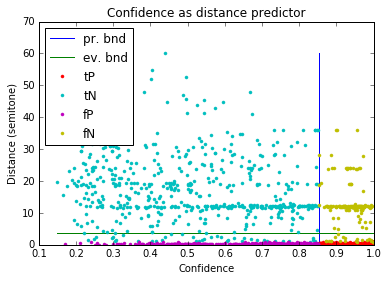

True Positive (confidence > mean confidence & distance < 1):	67.6519666269%
True Negative (confidence < mean confidence & distance > 1):	14.7794994041%

Confidence can predict:	82.431466031% of the estimations correctly


In [11]:
print "Confidence"
#plt.plot(conf, abs(st), '.'); plt.title('Confidence v.s. semitone distance'); plt.xlabel('Confidence'); plt.ylabel('Distance (semitone)'); plt.show();

print "Mean confidence:\t" + str(np.mean(conf)) + "\t(σ: " + str(np.std(conf));

tPc, tNc, fPc, fNc = pa.predict(pr=conf, ev=abs(st), ev_th=1, plot=1); plt.title('Confidence as distance predictor'); plt.xlabel('Confidence'); plt.ylabel('Distance (semitone)'); plt.show();
print "True Positive (confidence > mean confidence & distance < 1):\t" + str(len(tPc) / float(len(st)) * 100) + "%"
print "True Negative (confidence < mean confidence & distance > 1):\t" + str(len(tNc) / float(len(st)) * 100) + "%\n"
print "Confidence can predict:\t" + str((len(tPc) + len(tNc)) / float(len(st)) * 100) + "% of the estimations correctly"

Variance
Mean variance:	-0.733983	(σ: 0.347159


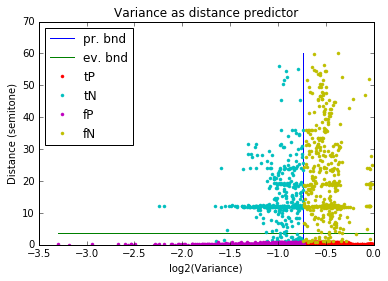

True Positive (variance < mean variance & distance < 1):	48.5339690107%
True Negative (variance > mean variance & distance > 1):	8.60548271752%

Variance can predict:	57.1394517282% of the estimations correctly


In [12]:
print "Variance"
#plt.plot(conf, abs(st), '.'); plt.title('Confidence v.s. semitone distance'); plt.xlabel('Confidence'); plt.ylabel('Distance (semitone)'); plt.show();

print "Mean variance:\t" + str(np.mean(lvar)) + "\t(σ: " + str(np.std(lvar));

tPv, tNv, fPv, fNv = pa.predict(pr=lvar, ev=abs(st), ev_th = 1, plot=1, invPred = True); plt.title('Variance as distance predictor'); plt.xlabel('log2(Variance)'); plt.ylabel('Distance (semitone)'); plt.show();
print "True Positive (variance < mean variance & distance < 1):\t" + str(len(tPv) / float(len(st)) * 100) + "%"
print "True Negative (variance > mean variance & distance > 1):\t" + str(len(tNv) / float(len(st)) * 100) + "%\n"
print "Variance can predict:\t" + str((len(tPv) + len(tNv)) / float(len(st)) * 100) + "% of the estimations correctly"

Salience
Mean salience:	0.441961	(σ: 0.202635


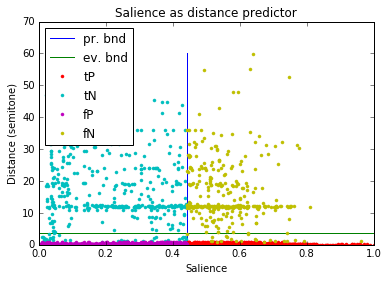

True Positive (variance < mean variance & distance < 1):	47.3659117998%
True Negative (variance > mean variance & distance > 1):	10.9415971395%

Salience can predict:	58.3075089392% of the estimations correctly


In [13]:
print "Salience"
print "Mean salience:\t" + str(np.mean(sal)) + "\t(σ: " + str(np.std(sal));

tPs, tNs, fPs, fNs = pa.predict(pr=sal, ev=abs(st), ev_th=1, plot=1); plt.title('Salience as distance predictor'); plt.xlabel('Salience'); plt.ylabel('Distance (semitone)'); plt.show();
print "True Positive (variance < mean variance & distance < 1):\t" + str(len(tPs) / float(len(st)) * 100) + "%"
print "True Negative (variance > mean variance & distance > 1):\t" + str(len(tNs) / float(len(st)) * 100) + "%\n"
print "Salience can predict:\t" + str((len(tPs) + len(tNs)) / float(len(st)) * 100) + "% of the estimations correctly"

### 2.1.2: Descriptors
Here some descriptor values are calculated for the sounds used in the pitch estimation. Correlations are investigated between the values obtained for the descriptors and the errors of the pitch estimation.

#### Biggest difference between correct estimation and incorrect estimations (contrast):
Here the mean values of different descriptors of correct estimations and the incorrect estimations are compaired. The descriptors that give the biggest difference after normalisation are considered to be able to separate the correct and incorrect estimations.

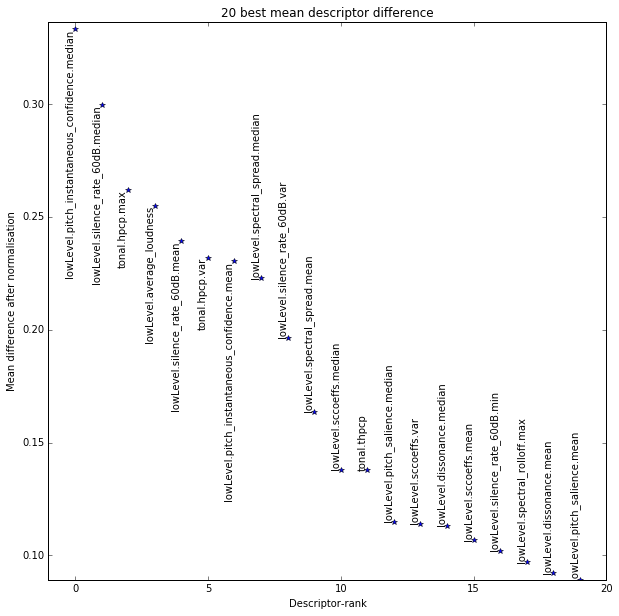

In [14]:
# calculate differences:
i_st_gt_1 = np.where(abs(st) >= 1)[0]; i_st_lt_1 = np.where(abs(st) < 1)[0];
dnames = pool.descriptorNames();
scores = np.zeros(len(dnames));
i = 0;
for dname in dnames:
    score = 0
    descr = pool[dname];
    if type(descr) == list:
        dnames = np.delete(dnames, i);
    else:
        if len(np.shape(descr)) > 1:
            descr = np.sum(descr, axis=1);
        if max(abs(descr)) > 0:
            descr = descr / float(np.max(abs(descr)));

        scores[i] = abs(np.mean(descr[i_st_lt_1]) - np.mean(descr[i_st_gt_1]))
        i += 1

# list best 20:
printBest = 20
cscores = np.copy(scores);
cdnames = np.copy(dnames);
best_names = []; best_scores = np.zeros(printBest);
for i in np.arange(printBest):
    best = np.where(cscores == max(cscores))[0][0];
    best_scores[i] = cscores[best]
    best_names.append(cdnames[best]);
    cscores = np.delete(cscores, best); cdnames = np.delete(cdnames, best);
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.axis([-1, printBest, min(best_scores) * 0.9998, max(best_scores) * 1.01])
i = 0
last_score = 100;
for name in best_names:
    if i < printBest / 2 - 3:
        va = 'top'
    else:
        va = 'bottom'
    ax.text(i, best_scores[i], name, rotation=90, ha='right', va=va)
    i += 1
ax.plot(best_scores, '*');
plt.title(str(printBest) + ' best mean descriptor difference'); plt.xlabel('Descriptor-rank'); plt.ylabel('Mean difference after normalisation');

#### true positive/ true negative:
In this test the descriptors are tested for their abilities to correctly identify what sounds will be correctly estimated. The descriptors which acceptations and rejections coincide mostly with respectively the correctly and the incorrectly estimated sounds (highest percetage of true positives and true negatives) are most potent as predictors.

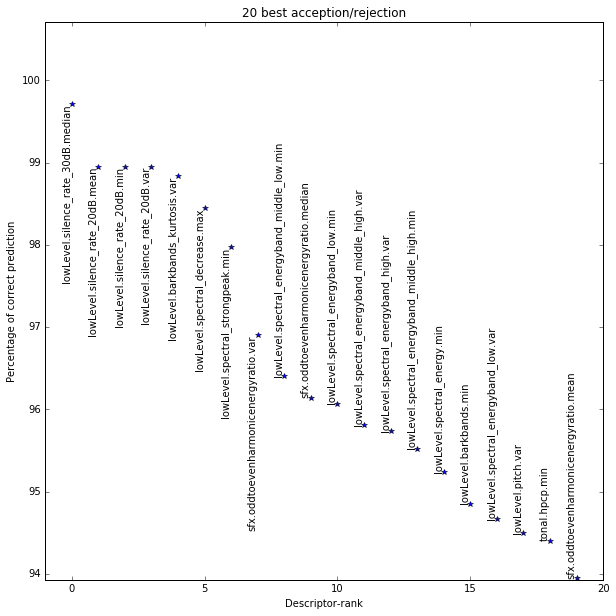

In [15]:
# calculate tP & tN:
dnames = pool.descriptorNames();
scores = np.zeros(len(dnames));
i = 0;
for dname in dnames:
    score = 0
    descr = pool[dname];
    if type(descr) == list:
        dnames = np.delete(dnames, i);
    else:
        if len(np.shape(descr)) > 1:
            descr = np.sum(descr, axis=1);
        tP, tN, fP, fN = pa.predict(ev=abs(st), pr=descr, ev_th=1);
        score = len(tP) + len(tN);
        tP, tN, fP, fN = pa.predict(ev=abs(st), pr=descr, invPred=True, ev_th=1);
        if score < len(tP) + len(tN):
            score = len(tP) + len(tN);
        tP, tN, fP, fN = pa.predict(ev=abs(st), pr=descr, invEval=True, ev_th=1);
        if score < len(tP) + len(tN):
            score = len(tP) + len(tN);
        tP, tN, fP, fN = pa.predict(ev=abs(st), pr=descr, invPred=True, invEval=True, ev_th=1);
        if score < len(tP) + len(tN):
            score = len(tP) + len(tN);
        scores[i] = score / float(len((st))) * 100;
        i += 1

# show best 20:
printBest = 20
cscores = np.copy(scores);
cdnames = np.copy(dnames);
best_names = []; best_scores = np.zeros(printBest);
for i in np.arange(printBest):
    best = np.where(cscores == max(cscores))[0][0];
    #print "Descriptor: " + cdnames[best] + "\tscores:\t" + str(cscores[best]) + "%"
    #plt.plot(pool[dnames[best]], 
    best_scores[i] = cscores[best]
    best_names.append(cdnames[best]);
    cscores = np.delete(cscores, best); cdnames = np.delete(cdnames, best);
    
fig = plt.figure(figsize=(10,10))
#plot = plt.plot(best_scores, '.');
ax = fig.add_subplot(111)
ax.axis([-1, printBest, min(best_scores) * 0.9998, max(best_scores) * 1.01])
i = 0
for name in best_names:
    if i < printBest / 2 - 2:
        va = 'top'
    else:
        va = 'bottom'
    ax.text(i, best_scores[i], name, rotation=90, ha='right', va=va)
    i += 1
ax.plot(best_scores, '*');
plt.title(str(printBest) + ' best acception/rejection'); plt.xlabel('Descriptor-rank'); plt.ylabel('Percentage of correct prediction');

#### Linear Regression
Here a line is fitted trough the datapoints (predictor value, semitone distance), afterwards the distance between the fitted line and each datapoint is taken as an prediction error measurement. A low prediction error means a better predictor quality.


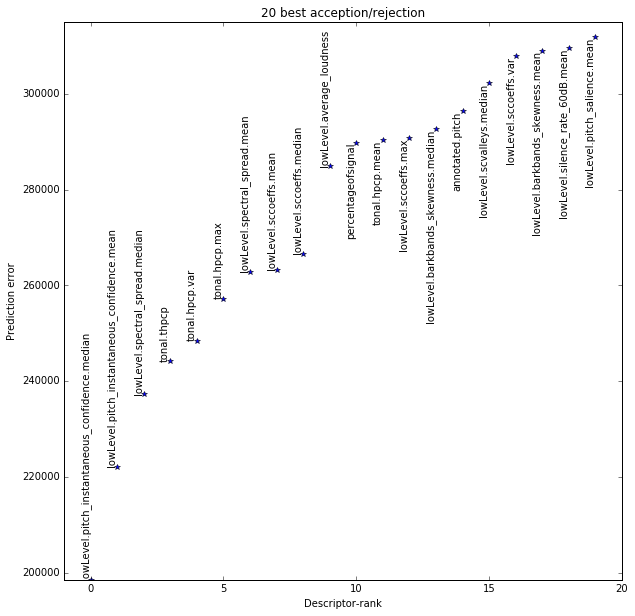

In [16]:
# calculate regressions:
dnames = pool.descriptorNames();
scores = np.array([]); coeff_a = np.array([]); coeff_b = np.array([]);
i = 0;
for dname in dnames:
    score = 0
    descr = pool[dname];
    if type(descr) == list:
        dnames = np.delete(dnames, i);
    else:
        if len(np.shape(descr)) > 1:
            descr = np.sum(descr, axis=1);
        if np.max(abs(descr)) > 0:
            descr = descr / float(np.max(abs(descr)));
            
        # linear regression:
        A = np.array([descr, np.ones(len(descr))]);
        w = np.linalg.lstsq(A.T, abs(st))
        a = w[0][0]; b = w[0][1];
        coeff_a = np.append(coeff_a, a); coeff_b = np.append(coeff_b, b);
        
        # squared error:
        score = (a*descr + b) - abs(st)
        scores = np.append(scores, np.sum(score*score));
        i += 1
        
# print best 20:
printBest = 20
cscores = np.copy(scores);
cdnames = np.copy(dnames);
best_names = []; best_scores = np.zeros(printBest);
for i in np.arange(printBest):
    best = np.where(cscores == min(cscores))[0][0];
    #print "Descriptor: " + cdnames[best] + "\tscores:\t" + str(cscores[best]) + "%"
    #plt.plot(pool[dnames[best]], 
    best_scores[i] = cscores[best]
    best_names.append(cdnames[best]);
    cscores = np.delete(cscores, best); cdnames = np.delete(cdnames, best);
    
fig = plt.figure(figsize=(10,10))
#plot = plt.plot(best_scores, '.');
ax = fig.add_subplot(111)
ax.axis([-1, printBest, min(best_scores) * 0.9998, max(best_scores) * 1.01])
i = 0
for name in best_names:
    if i < printBest / 2:
        va = 'bottom'
    else:
        va = 'top'
    ax.text(i, best_scores[i], name, rotation=90, ha='right', va=va)
    i += 1
ax.plot(best_scores, '*');
plt.title(str(printBest) + ' best acception/rejection'); plt.xlabel('Descriptor-rank'); plt.ylabel('Prediction error');

Contrast
- conf
- silence_rate
- hpcp
- av_loudness
- spectral_spread
- sccoeffs
- salience
- dissonance
- spectral_rolloff

tP/tN
- silence_rate
- barkbands_kurtosis
- spectral_decrease
- spectral_strongpeak
- oddtoevenharmonicenergyratio
- spectral_energyband_middle_low
- spectral_energyband_low
- spectral_energyband_middle_high
- spectral_energyband_high
- spectral_energy
- barkbands
- pitch variance
- hpcp

Lin reg
- conf
- spectral_spread
- thpcp
- hpcp
- spectral_spread
- sccoeffs
- average_loudness
- percentageofsignal
- barkbands_skewness
- annotated pitch
- scvalleys
- silence_rate

- spectral_spread
- dissonance
- spectral_rolloff
- barkbands_kurtosis
- spectral_decrease
- spectral_strongpeak
- oddtoevenharmonicenergyratio
- spectral_energyband_middle_low
- spectral_energyband_low
- spectral_energyband_middle_high
- spectral_energyband_high
- spectral_energy
- barkbands
- thpcp
- barkbands_skewness
- annotated pitch
- hpcp
- sccoeffs (spectral contrast)
- scvalleys (spectral contrast)

In the above plots the earlier observation that the 'confidence' measurement was a good prediction for the errors is confirmed. Also the salience and pitch variance measurements return as being able to predict the error values to some extend.

From the first two plots and especially the 'true positive/true negative' plot a clear importance can be seen of the 'silence_rate' descriptors. These descriptors give a measure for the ammount frames with a signal above a certain amplitude treshold versus the amount of frames with a signal below a certain amplitude treshold. Also the 'percentageofsignal' measurement found by the linear regression method is a measurement of the amount of frames that contain a the sound versus the total amount of frames.

Also in the first plot indicates that the 'average_loudness' is a descriptor that is able to predict a lot of errors, this measurement is ofcourse influenced by the presence of silent frames, but it is also possible that some sounds are very silent and in this way badly influence the estimation.




## 2.1: Prediction of octave errors
Around $50$% of the errors can be attributed to octave errors. It might be usefull to have predictors for the occurence of an octave error as these estimations are musically very close to the annotated pitch but add a minimal error of 12 semitones.

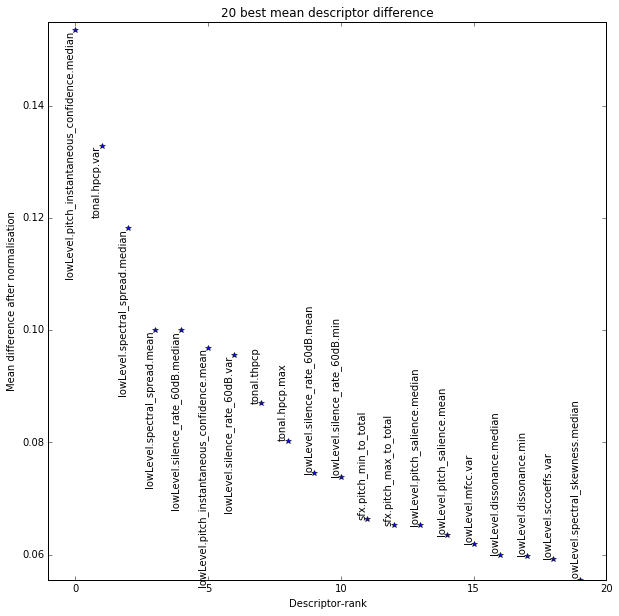

In [17]:
# calculate differences:
i_octErr; i_no_octErr = ut.remove_overlap(i_err, i_octErr);
dnames = pool.descriptorNames();
scores = np.zeros(len(dnames));
i = 0;
for dname in dnames:
    score = 0
    descr = pool[dname];
    if type(descr) == list:
        dnames = np.delete(dnames, i);
    else:
        if len(np.shape(descr)) > 1:
            descr = np.sum(descr, axis=1);
        if max(abs(descr)) > 0:
            descr = descr / float(np.max(abs(descr)));

        scores[i] = abs(np.mean(descr[i_no_octErr]) - np.mean(descr[i_octErr]))
        i += 1

# list best 20:
printBest = 20
cscores = np.copy(scores);
cdnames = np.copy(dnames);
best_names = []; best_scores = np.zeros(printBest);
for i in np.arange(printBest):
    best = np.where(cscores == max(cscores))[0][0];
    best_scores[i] = cscores[best]
    best_names.append(cdnames[best]);
    cscores = np.delete(cscores, best); cdnames = np.delete(cdnames, best);
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.axis([-1, printBest, min(best_scores) * 0.9998, max(best_scores) * 1.01])
i = 0
last_score = 100;
for name in best_names:
    if i < printBest / 2 - 3:
        va = 'top'
    else:
        va = 'bottom'
    ax.text(i, best_scores[i], name, rotation=90, ha='right', va=va)
    i += 1
ax.plot(best_scores, '*');
plt.title(str(printBest) + ' best mean descriptor difference'); plt.xlabel('Descriptor-rank'); plt.ylabel('Mean difference after normalisation');

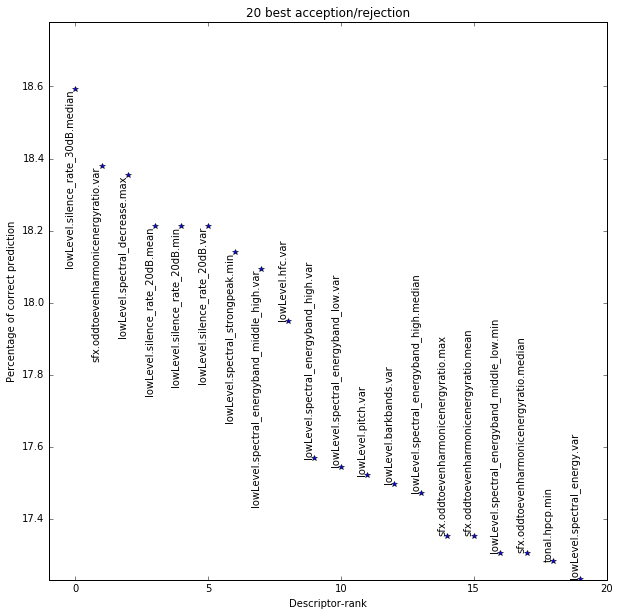

In [22]:
# calculate tP & tN:
dnames = pool.descriptorNames();
scores = np.zeros(len(dnames));

oe = np.zeros(len(st));
oe[i_octErr] = 10;
oe = oe[i_err];

i = 0;
for dname in dnames:
    score = 0
    descr = pool[dname];
    if type(descr) == list:
        dnames = np.delete(dnames, i);
    else:
        if len(np.shape(descr)) > 1:
            descr = np.sum(descr, axis=1);
        descr = descr[i_err];
        tP, tN, fP, fN = pa.predict(ev=oe, pr=descr, ev_th=1);
        score = len(tP) + len(tN);
        tP, tN, fP, fN = pa.predict(ev=oe, pr=descr, invPred=True, ev_th=1);
        if score < len(tP) + len(tN):
            score = len(tP) + len(tN);
        tP, tN, fP, fN = pa.predict(ev=oe, pr=descr, invEval=True, ev_th=1);
        if score < len(tP) + len(tN):
            score = len(tP) + len(tN);
        tP, tN, fP, fN = pa.predict(ev=oe, pr=descr, invPred=True, invEval=True, ev_th=1);
        if score < len(tP) + len(tN):
            score = len(tP) + len(tN);
        scores[i] = score / float(len((st))) * 100;
        i += 1

# show best 20:
printBest = 20
cscores = np.copy(scores);
cdnames = np.copy(dnames);
best_names = []; best_scores = np.zeros(printBest);
for i in np.arange(printBest):
    best = np.where(cscores == max(cscores))[0][0];
    #print "Descriptor: " + cdnames[best] + "\tscores:\t" + str(cscores[best]) + "%"
    #plt.plot(pool[dnames[best]], 
    best_scores[i] = cscores[best]
    best_names.append(cdnames[best]);
    cscores = np.delete(cscores, best); cdnames = np.delete(cdnames, best);
    
fig = plt.figure(figsize=(10,10))
#plot = plt.plot(best_scores, '.');
ax = fig.add_subplot(111)
ax.axis([-1, printBest, min(best_scores) * 0.9998, max(best_scores) * 1.01])
i = 0
for name in best_names:
    if i < printBest / 2 - 2:
        va = 'top'
    else:
        va = 'bottom'
    ax.text(i, best_scores[i], name, rotation=90, ha='right', va=va)
    i += 1
ax.plot(best_scores, '*');
plt.title(str(printBest) + ' best acception/rejection'); plt.xlabel('Descriptor-rank'); plt.ylabel('Percentage of correct prediction');

contrast
- conf
- hpcp
- spectral_spread
- silence_rate
- pitch_min_to_total
- salience
- mfcc
- dissonance
- sccoeffs
- spectral_skewness


tP/tN:
- silence_rate
- oddtoevenharmoniceneryratio
- spectral_decrease
- spectral_strongpeak
- spectral_energyband_middle_high
- hfc
- pitch variance
- barkbands variance
- hpcp
- spectral energy

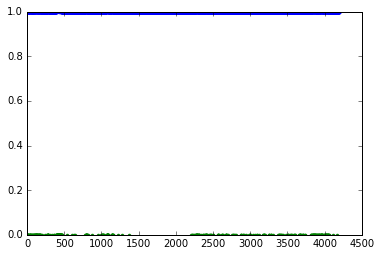

# 3. Improvements


- Silence
- Confidence?


## Octave Errors:
As stated above a good $50$% of the errors can be accounted for by octave errors. The mean error will drop from 

- confidence tov octerr?


# ?? References:
essentia: http://essentia.upf.edu

Bogdanov, D., Wack N., Gómez E., Gulati S., Herrera P., Mayor O., et al. (2013). ESSENTIA: an Audio Analysis Library for Music Information Retrieval. International Society for Music Information Retrieval Conference (ISMIR'13). 493-498.

In [ ]:
descr = pool['tonal.thpcp'];
descr / float(np.max(abs(descr)))

### 2.1.2: Prediction of octave errors
As seen above around $50$% of the wrong estimations are octave errrors. It might be valueable te determine a predictor for the occurence of an octave error. Here the confidence, variance and salience measurements are tested as predictors for octave errors. However as is evident from the data and plot below none of the three predictors can predict the occurence of an octave error.

Predictor for octave errors:
Confidence:
	Octave errors	 0.65991	(σ: 0.24621)
	Other errors:	 0.48213	(σ: 0.23443)
	Non errors:	 0.91254	(σ: 0.13314)

Mean variance:
	Octave errors:	 0.61121	(σ: 0.14724)
	Other errors:	 0.63037	(σ: 0.11026)
	Non errors:	 0.61666	(σ: 0.13307)

Mean salience:
	Octave errors:	 0.38320	(σ: 0.19500)
	Other errors:	 0.30500	(σ: 0.22782)
	Non errors:	 0.46295	(σ: 0.19362)



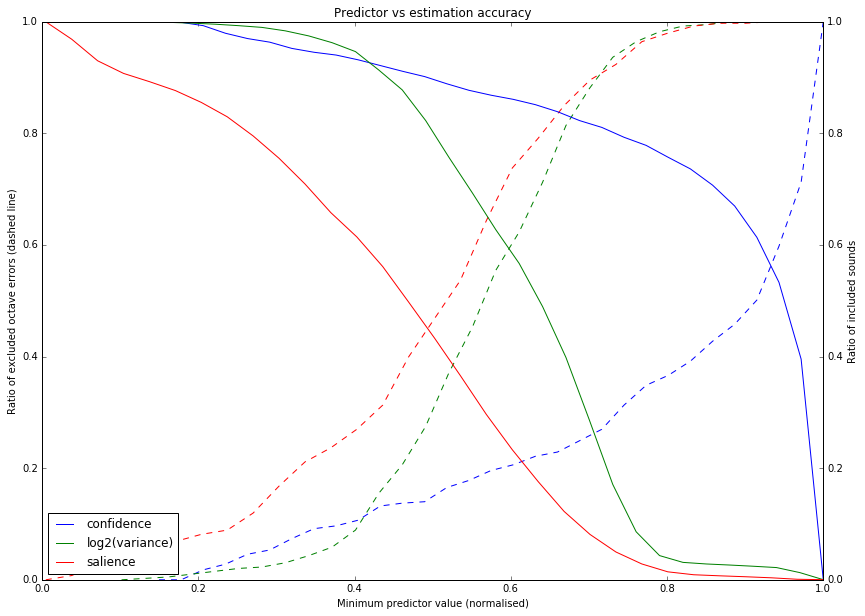

In [88]:
print "Predictor for octave errors:"
mTag = ut.freq2midi(pTag); mEst = ut.freq2midi(pEst);
i_err = np.where(abs(np.round(mTag) - np.round(mEst)) > 1)[0];
q_pTag = ut.midi2freq(np.round(mTag)); q_pEst = ut.midi2freq(np.round(mEst));

x = np.log2(q_pEst[i_err] / q_pTag[i_err]);

#fig, ax = plt.subplots(1, 1, figsize=(10, 6));
#hstplt = ax.hist(x, range=(-max(-x), max(-x)), bins=16*np.round(max(-x)) + 1); bw = hst[1][3]-hst[1][2];
hst = np.histogram(x, range=(-max(-x), max(-x)), bins=16*np.round(max(-x)) + 1); bw = hst[1][3]-hst[1][2];
for i in range(2, 9):
    ax.axvline(x=np.log2(i / 1), color='green');
    ax.axvline(x=-np.log2(i / 1), color='green');

 

# octave errors:
i_octErrEdges = list();
for i in range(1, 9):
    val = np.log2(i);
    i_sup = 0; i_sub = 0
    for lbound in hst[1]:
        if lbound < -val:
            i_sub += 1
        if lbound < val:
            i_sup += 1
    i_octErrEdges.append((hst[1][i_sub-1], hst[1][i_sub]))
    i_octErrEdges.append((hst[1][i_sup-1], hst[1][i_sup]))
    
i_octErr = list();
for binEdges in i_octErrEdges:
        i = 0;
        for val in x:
            if val > binEdges[0] and val < binEdges[1]:
                i_octErr.append(i)
            i+=1

print "Confidence:"
print "\tOctave errors\t %1.5f\t(σ: %1.5f)" % (np.mean(conf[i_err[i_octErr]]), np.std(conf[i_err[i_octErr]]))
print "\tOther errors:\t %1.5f\t(σ: %1.5f)" % (np.mean(conf[np.delete(i_err, i_octErr)]), np.std(conf[np.delete(i_err, i_octErr)]))
print "\tNon errors:\t %1.5f\t(σ: %1.5f)\n" % (np.mean(np.delete(conf, i_err)), np.std(np.delete(conf, i_err)));

print "Mean variance:"
print "\tOctave errors:\t %5.5f\t(σ: %1.5f)" % (np.mean(var[i_err[i_octErr]]), np.std(var[i_err[i_octErr]]))
print "\tOther errors:\t %5.5f\t(σ: %1.5f)" % (np.mean(var[np.delete(i_err, i_octErr)]), np.std(var[np.delete(i_err, i_octErr)]))
print "\tNon errors:\t %5.5f\t(σ: %1.5f)\n" % (np.mean(np.delete(var, i_err)), np.std(np.delete(var, i_err)));

print "Mean salience:"
print "\tOctave errors:\t %5.5f\t(σ: %1.5f)" % (np.mean(sal[i_err[i_octErr]]), np.std(sal[i_err[i_octErr]]))
print "\tOther errors:\t %5.5f\t(σ: %1.5f)" % (np.mean(sal[np.delete(i_err, i_octErr)]), np.std(sal[np.delete(i_err, i_octErr)]))
print "\tNon errors:\t %5.5f\t(σ: %1.5f)\n" % (np.mean(np.delete(sal, i_err)), np.std(np.delete(sal, i_err)));


fig, ax1 = plt.subplots(1, 1, figsize=(14, 10))
ax2 = ax1.twinx()

octerr = np.zeros(len(st)); octerr[i_octErr] = 1;

conf = ut.normalise(pool['lowLevel.pitch_instantaneous_confidence.median']);
var = ut.normalise(np.log2(pool['lowLevel.pitch.var']));
sal = ut.normalise(pool['lowLevel.pitch_salience.median']);

descriptors = [conf, var, sal];
d_names = ['confidence', 'log2(variance)', 'salience'];
i = 0
y_min = list(); y_max = list()
for descr in descriptors:
    values, edges = np.histogram(descr, bins=30)
    accuracies = list()
    counts = list()
    
    for d_min in edges:
        # Take only dataset instances with confidence above conf_min
        i_incl = np.where(descr >= d_min)[0]
        i_excl = np.where(descr < d_min)[0]
        filtered_data = st[i_incl];
        #accuracies.append((np.sum(st) - np.sum(st[np.where(st[i_incl] > 1)])) / np.sum(st))

        acc = np.sum(octerr[i_excl]) / float(np.sum(octerr));
        accuracies.append(acc);
        counts.append(len(filtered_data) / float(len(octerr)));

    ax1.plot(edges[:len(accuracies)], accuracies, ls="--", label=d_names[i]);
    ax2.plot(edges[:len(accuracies)], counts, label=d_names[i])
    y_min.append(min(accuracies)); y_max.append(max(accuracies));
    #ax1.plot(edges[:len(accuracies)], ut.normalise(accuracies) + ut.normalise(counts));
    i += 1
    
ax1.set_title('Predictor vs estimation accuracy')
ax1.set_ylabel('Ratio of excluded octave errors (dashed line)');
ax1.set_xlabel('Minimum predictor value (normalised)')
ax2.set_ylabel('Ratio of included sounds')
ax2.legend(loc=3)
ax1.set_ylim(0, 1)
ax1.set_yticks([float(ax1.get_ylim()[1])*(float(i)/5) for i in range(0,6)])
ax2.set_ylim(0.0, ax2.get_ylim()[1])
ax2.set_yticks([float(ax2.get_ylim()[1])*(float(i)/5) for i in range(0,6)])

plt.show()